# Importing the file and removing punctuations

In [1]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/nytimes.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
y=tokenizer.tokenize(x)
filtered_sentence = (" ").join(y)

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out11.txt', 'w+') 
file1.write(filtered_sentence)
file1.close()

# Loading Spark into the system

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q !wget -q http://apache.osuosl.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [4]:
!pip install -U pyarrow

     |████████████████████████████████| 20.7MB 1.7MB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [6]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession

In [7]:
if __name__ == "__main__":
	
	# create Spark context with necessary configuration
	sc = SparkContext("local","PySpark Word Count Exmaple")

# Removing Stop words and doing Word count using MapReduce

In [8]:
from pyspark.ml.feature import StopWordsRemover

# Define a list of stop words or use default list
remover = StopWordsRemover()
stop_words = remover.getStopWords() 
  # read data from text file and split each line into words
words = sc.textFile('/content/drive/My Drive/Colab Notebooks/out11.txt').flatMap(lambda line: line.split(" "))
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = words.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word 
wordCounts = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)
#wordCounts= words.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b)

# Sorting the words in descending order based on hteir count.

In [9]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [10]:
wordCounts=wordCounts.sortByKey(False)

In [11]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [12]:
wordCounts.take(100)

[('said', 56734),
 ('mr', 44631),
 ('one', 19488),
 ('new', 17649),
 ('like', 14223),
 ('two', 12942),
 ('people', 12852),
 ('year', 12712),
 ('also', 12531),
 ('first', 11221),
 ('last', 10975),
 ('time', 10620),
 ('ms', 10550),
 ('com', 10171),
 ('years', 10069),
 ('2016', 9766),
 ('nytimes', 9426),
 ('www', 8900),
 ('html', 8899),
 ('http', 8890),
 ('url', 8889),
 ('trump', 8732),
 ('many', 8235),
 ('state', 7697),
 ('even', 7679),
 ('world', 7337),
 ('city', 7113),
 ('percent', 6949),
 ('company', 6720),
 ('1', 6691),
 ('m', 6657),
 ('three', 6615),
 ('york', 6594),
 ('states', 6588),
 ('made', 6559),
 ('may', 6407),
 ('united', 6382),
 ('back', 6206),
 ('re', 5983),
 ('much', 5940),
 ('million', 5927),
 ('make', 5854),
 ('still', 5792),
 ('get', 5781),
 ('way', 5775),
 ('american', 5607),
 ('day', 5491),
 ('work', 5463),
 ('game', 5454),
 ('president', 5347),
 ('since', 5231),
 ('long', 5155),
 ('government', 5121),
 ('well', 5102),
 ('000', 5038),
 ('going', 5006),
 ('including',

# Saving top 100 words

In [13]:
xy=wordCounts.take(100)

In [14]:
zz=list()
gg=list()
for xx in xy:
  zz.append(xx[1])
  gg.append(xx[0])

hell=" "
noo=0
for yy in zz:
  for ll in range(yy):
    hell+=(str(gg[noo]))
    hell+=" "
  noo+=1

In [15]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out_task1.txt', 'w+') 
file1.write(hell)
file1.close()

# Forming Word Cloud for top 100 words

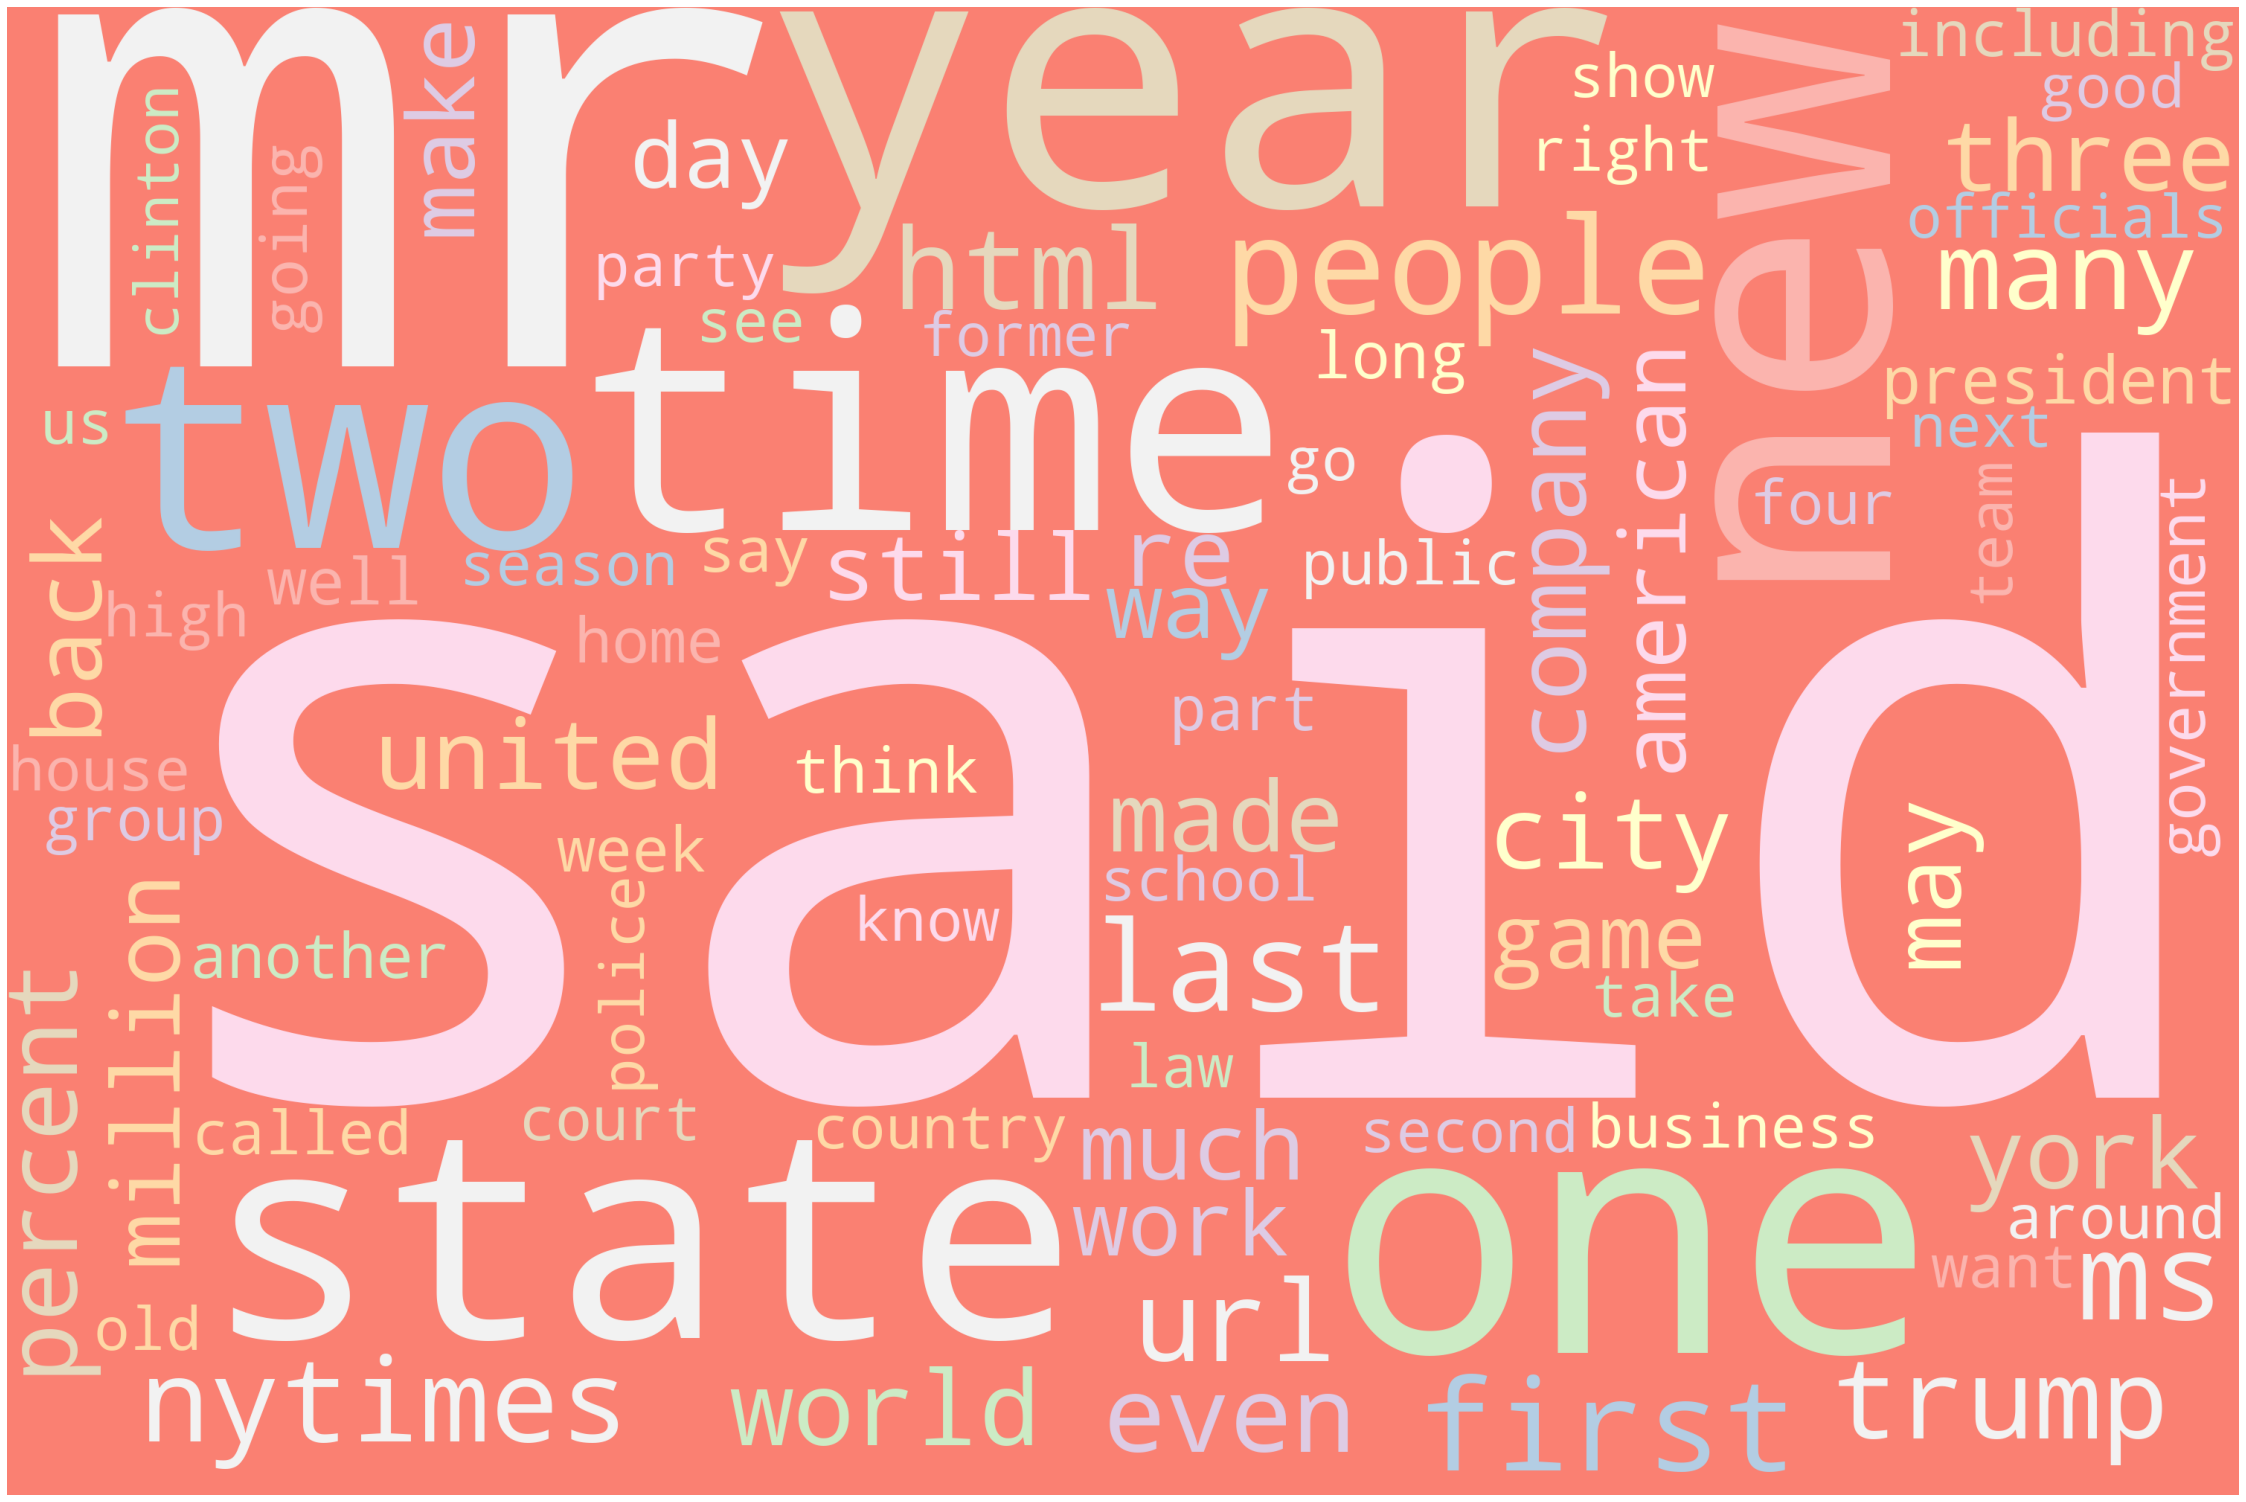

In [16]:
with open('/content/drive/My Drive/Colab Notebooks/out_task1.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(x)
wordcloud.to_file('/content/drive/My Drive/Colab Notebooks/task1_wordcloud.png')
# Plot
plot_cloud(wordcloud)